In [16]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re

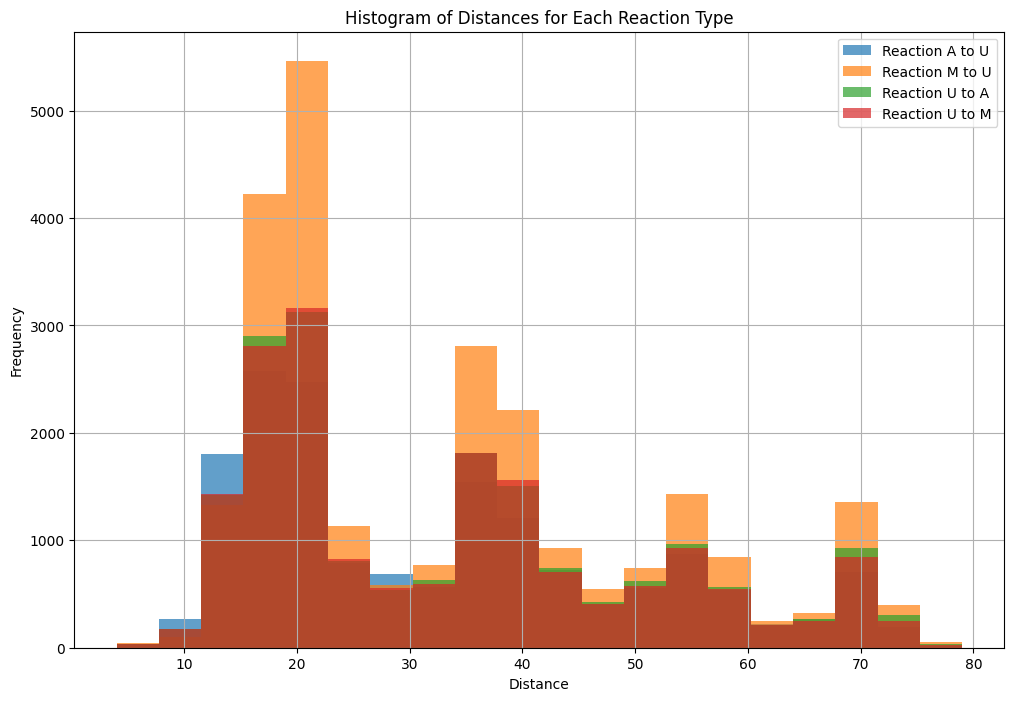

Reaction A to U count: 16451
Reaction M to U count: 25552
Reaction U to A count: 18009
Reaction U to M count: 17704


In [17]:
import re
import matplotlib.pyplot as plt

# Define the path to your log file
log_file_path = 'output.log'

# Initialize a dictionary to store the count of each reaction type
reaction_counts = {
    'f1': 0,
    'f2': 0,
    'f3': 0,
    'f4': 0
}

# Initialize dictionaries to store distances for each type of reaction
reaction_distances = {
    'f1': [],
    'f2': [],
    'f3': [],
    'f4': []
}

# Define a mapping from log reaction types to our reaction types
reaction_map = {
    'reacUM': 'f1',
    'reacMU': 'f2',
    'reacUA': 'f3',
    'reacAU': 'f4'
}

# Open the log file and read its contents
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Define a regex pattern to match lines containing reacting atom IDs and reaction types
pattern = re.compile(r'reacted_atom_IDs: (reac\w+) (\d+) (\d+)')

# Loop through each line and search for the pattern
for line in lines:
    match = pattern.search(line)
    if match:
        # Extract the reaction type and atom IDs
        reaction_type = match.group(1)
        atom_id_1 = int(match.group(2))
        atom_id_2 = int(match.group(3))
        
        # Calculate distance
        distance = abs(atom_id_1 - atom_id_2)
        
        # Get the corresponding reaction type from the map
        reaction_key = reaction_map[reaction_type]
        
        # Append distance to the appropriate reaction type
        reaction_distances[reaction_key].append(distance)
        
        # Increment the count for the corresponding reaction type
        reaction_counts[reaction_key] += 1

labels = {
    'f1': 'Reaction A to U',
    'f2': 'Reaction M to U',
    'f3': 'Reaction U to A',
    'f4': 'Reaction U to M'
}

# Plot histograms of distances for each reaction type
plt.figure(figsize=(12, 8))
for reaction_type, distances in reaction_distances.items():
    plt.hist(distances, bins=20, alpha=0.7, label=f'{labels[reaction_type]}', density=False)

plt.title('Histogram of Distances for Each Reaction Type')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print the counts of each reaction type
for reaction_type, count in reaction_counts.items():
    print(f'{labels[reaction_type]} count: {count}')


In [18]:
import re
import matplotlib.pyplot as plt

# Define the path to your log file
log_file_path = 'output.log'

# Initialize a dictionary to store the count of each reaction type
reaction_counts = {
    'f1': 0,
    'f2': 0,
    'f3': 0,
    'f4': 0
}

# Initialize dictionaries to store distances for each type of reaction
reaction_distances = {
    'f1': [],
    'f2': [],
    'f3': [],
    'f4': []
}

# Define a mapping from log reaction types to our reaction types
reaction_map = {
    'reacAU': 'f1',
    'reacMU': 'f2',
    'reacUA': 'f3',
    'reacUM': 'f4'
}

# Open the log file and read its contents
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Define a regex pattern to match lines containing reacting atom IDs and reaction types
pattern = re.compile(r'reacted_atom_IDs: (reac\w+) (\d+) (\d+)')

# List to store reaction data for further use if needed
reaction_data = []

# Loop through each line and search for the pattern
for line in lines:
    match = pattern.search(line)
    if match:
        # Extract the reaction type and atom IDs
        reaction_type = match.group(1)
        atom_id_1 = int(match.group(2))
        atom_id_2 = int(match.group(3))
        
        # Calculate distance
        distance = abs(atom_id_1 - atom_id_2)
        
        # Get the corresponding reaction type from the map
        reaction_key = reaction_map[reaction_type]
        
        # Check if this reaction data already exists
        if (reaction_type, atom_id_1, atom_id_2, distance) not in reaction_data:
            # Append distance to the appropriate reaction type
            reaction_distances[reaction_key].append(distance)
            
            # Increment the count for the corresponding reaction type
            reaction_counts[reaction_key] += 1
    
            # Store the reaction data (including reaction type)
            reaction_data.append((reaction_type, atom_id_1, atom_id_2, distance))


labels = {
    'f1': 'Reaction A to U',
    'f2': 'Reaction M to U',
    'f3': 'Reaction U to A',
    'f4': 'Reaction U to M'
}

# Plot histograms of distances for each reaction type
plt.figure(figsize=(12, 8))
for reaction_type, distances in reaction_distances.items():
    plt.hist(distances, bins=20, alpha=0.7, label=f'{labels[reaction_type]}', density=True)

plt.title('Histogram of Distances for Each Reaction Type')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print the counts of each reaction type
for reaction_type, count in reaction_counts.items():
    print(f'{labels[reaction_type]} count: {count}')

# Print stored reaction data if needed
for reaction in reaction_data:
    print(f'Reaction {reaction[0]} between atom IDs {reaction[1]} and {reaction[2]} with distance {reaction[3]}')


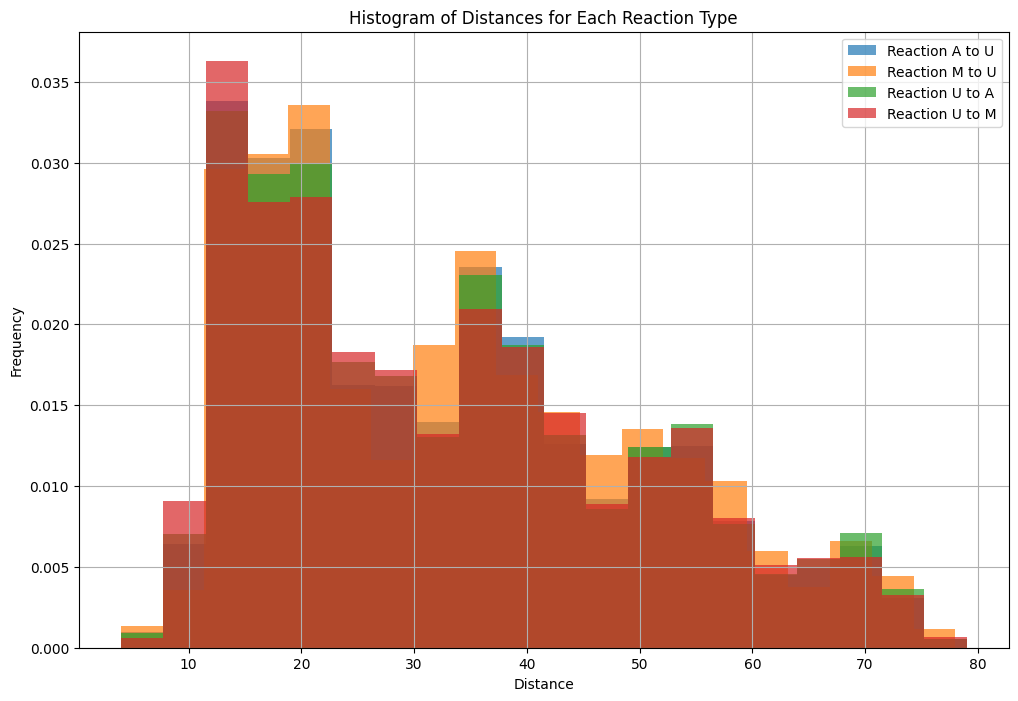

Reaction A to U count: 2965
Reaction M to U count: 3042
Reaction U to A count: 2923
Reaction U to M count: 3182


In [ ]:
import re
import matplotlib.pyplot as plt

# Define the path to your log file
log_file_path = 'output.log'

# Initialize dictionaries to store counts and distances for each type of reaction
reaction_counts = {'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0}
reaction_distances = {'f1': set(), 'f2': set(), 'f3': set(), 'f4': set()}

# Define a mapping from log reaction types to our reaction types
reaction_map = {'reacAU': 'f1', 'reacMU': 'f2', 'reacUA': 'f3', 'reacUM': 'f4'}

# Define a regex pattern to match lines containing reacting atom IDs and reaction types
pattern = re.compile(r'reacted_atom_IDs: (reac\w+) (\d+) (\d+)')

# Open the log file and read its contents
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Loop through each line and search for the pattern
for line in lines:
    match = pattern.search(line)
    if match:
        # Extract the reaction type and atom IDs
        reaction_type = match.group(1)
        atom_id_1 = int(match.group(2))
        atom_id_2 = int(match.group(3))
        
        # Calculate distance
        distance = abs(atom_id_1 - atom_id_2)
        
        # Get the corresponding reaction type from the map
        reaction_key = reaction_map[reaction_type]
        
        # Check if this reaction data already exists
        if (atom_id_1, atom_id_2, distance) not in reaction_distances[reaction_key]:
            # Append distance to the appropriate reaction type
            reaction_distances[reaction_key].add((atom_id_1, atom_id_2, distance))
            
            # Increment the count for the corresponding reaction type
            reaction_counts[reaction_key] += 1

labels = {'f1': 'Reaction A to U', 'f2': 'Reaction M to U', 'f3': 'Reaction U to A', 'f4': 'Reaction U to M'}

# Plot histograms of distances for each reaction type
plt.figure(figsize=(12, 8))
for reaction_type, distances in reaction_distances.items():
    plt.hist([distance[2] for distance in distances], bins=20, alpha=0.7, label=f'{labels[reaction_type]}', density=True)

plt.title('Histogram of Distances for Each Reaction Type')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print the counts of each reaction type
for reaction_type, count in reaction_counts.items():
    print(f'{labels[reaction_type]} count: {count}')


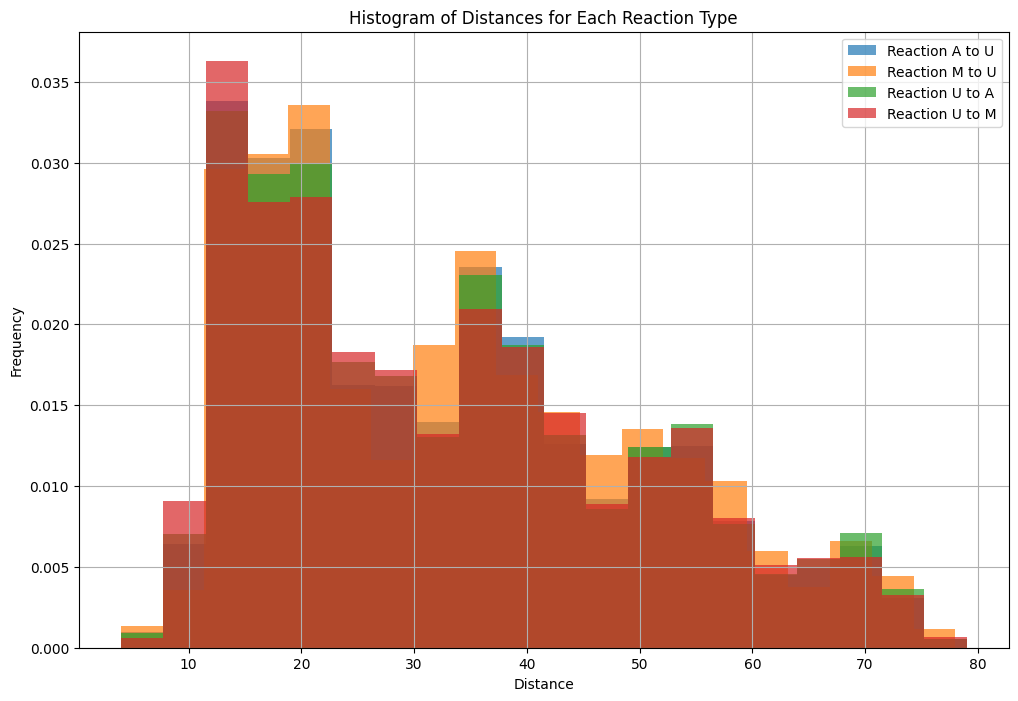

Reaction A to U count: 5727
Reaction M to U count: 7244
Reaction U to A count: 5637
Reaction U to M count: 6072


In [ ]:
import re
import matplotlib.pyplot as plt

# Define the path to your log file
log_file_path = 'output.log'

# Initialize dictionaries to store counts and distances for each type of reaction
reaction_counts = {'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0}
reaction_distances = {'f1': set(), 'f2': set(), 'f3': set(), 'f4': set()}

# Define a mapping from log reaction types to our reaction types
reaction_map = {'reacAU': 'f1', 'reacMU': 'f2', 'reacUA': 'f3', 'reacUM': 'f4'}

# Define a regex pattern to match lines containing reacting atom IDs and reaction types
pattern = re.compile(r'reacted_atom_IDs: (reac\w+) (\d+) (\d+)')

# Open the log file and read its contents
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Loop through each line and search for the pattern
for line in lines:
    match = pattern.search(line)
    if match:
        # Extract the reaction type and atom IDs
        reaction_type = match.group(1)
        atom_id_1 = int(match.group(2))
        atom_id_2 = int(match.group(3))
        
        # Calculate distance
        distance = abs(atom_id_1 - atom_id_2)
        
        # Get the corresponding reaction type from the map
        reaction_key = reaction_map[reaction_type]
        
        # Add the reaction event to the set of unique events
        reaction_distances[reaction_key].add((reaction_type, atom_id_1, atom_id_2))
        
        # Increment the count for the corresponding reaction type
        reaction_counts[reaction_key] += 1

labels = {'f1': 'Reaction A to U', 'f2': 'Reaction M to U', 'f3': 'Reaction U to A', 'f4': 'Reaction U to M'}

# Plot histograms of distances for each reaction type
plt.figure(figsize=(12, 8))
for reaction_type, distances in reaction_distances.items():
    plt.hist([abs(id1 - id2) for _, id1, id2 in distances], bins=20, alpha=0.7, label=f'{labels[reaction_type]}', density=True)

plt.title('Histogram of Distances for Each Reaction Type')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print the counts of each reaction type
for reaction_type, count in reaction_counts.items():
    print(f'{labels[reaction_type]} count: {count}')
